# Single-Variate Logistic Regression

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
x = np.arange(1,11).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [52]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [53]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [54]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [55]:
model.classes_

array([0, 1])

In [56]:
o = model.predict_proba(x)
count = 0
for i in range(0,10):
    print(o[i][0], model.predict(x[[i]]))
    count = count+1
    if count == 3:
        print("\n")

0.6255560200702339 [0]
0.5825012437774681 [0]
0.5381509100288453 [0]


0.4931883976161112 [1]
0.4483358004783935 [1]
0.40430820354708663 [1]
0.3617688911820517 [1]
0.321291308094099 [1]
0.2833321250255635 [1]
0.24821750518471364 [1]


In [57]:
model.predict(x) # [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [58]:
score = model.score(x, y)
score

0.8

<AxesSubplot:>

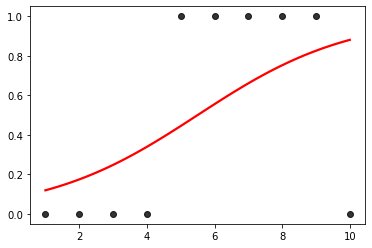

In [59]:
import seaborn as sns

sns.regplot(x=x, y=y, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [60]:
model.score(x, y)

8e-01

In [61]:
confusion_matrix(y, model.predict(x))

array([[3, 2],
       [0, 5]])

In [62]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [63]:
model.predict(x) 
    
    #For ref - original array
    
    # [0, 0, 0, [0], 1, 1, 1, 1, 1, [0]] 

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

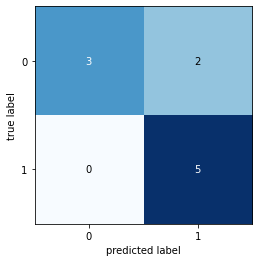

In [64]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y, model.predict(x))

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
#[TN FP]
#[FN TP]

# Improving the model

### Let’s work with the regularization strength C, instead of the default value of 1

In [65]:
model = LogisticRegression(solver='liblinear', C = 2.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=2.0, random_state=0, solver='liblinear')

In [66]:
model.predict(x)
#      0, 0, 0, 0, 1, 1, 1, 1, 1, [0] -> original array

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [67]:
confusion_matrix(y, model.predict(x))
#[TN FP]
#[FN TP]

array([[4, 1],
       [0, 5]])

In [69]:
score_ = model.score(x, y)
score_

0.9

<AxesSubplot:>

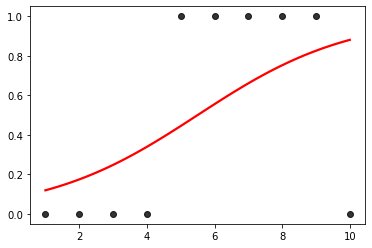

In [70]:
import seaborn as sns

sns.regplot(x=x, y=y, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})